<strong>BUSINESS CASE:</strong> The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [15]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
## loading the data
data=pd.read_csv('bank-additional-full.csv', delimiter=';')

In [18]:
pd.set_option('display.max_columns',None)

In [19]:
## Getting the first few rows of data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Basic Checks

In [20]:
# Quick summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
# Quick summary of data
data.shape

(41188, 21)

In [23]:
# Statistical information of the data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Exploratory Data Analysis

In [25]:
# Checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [26]:
## Create a new dataframe with continuous variables only
data1=data[['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']]

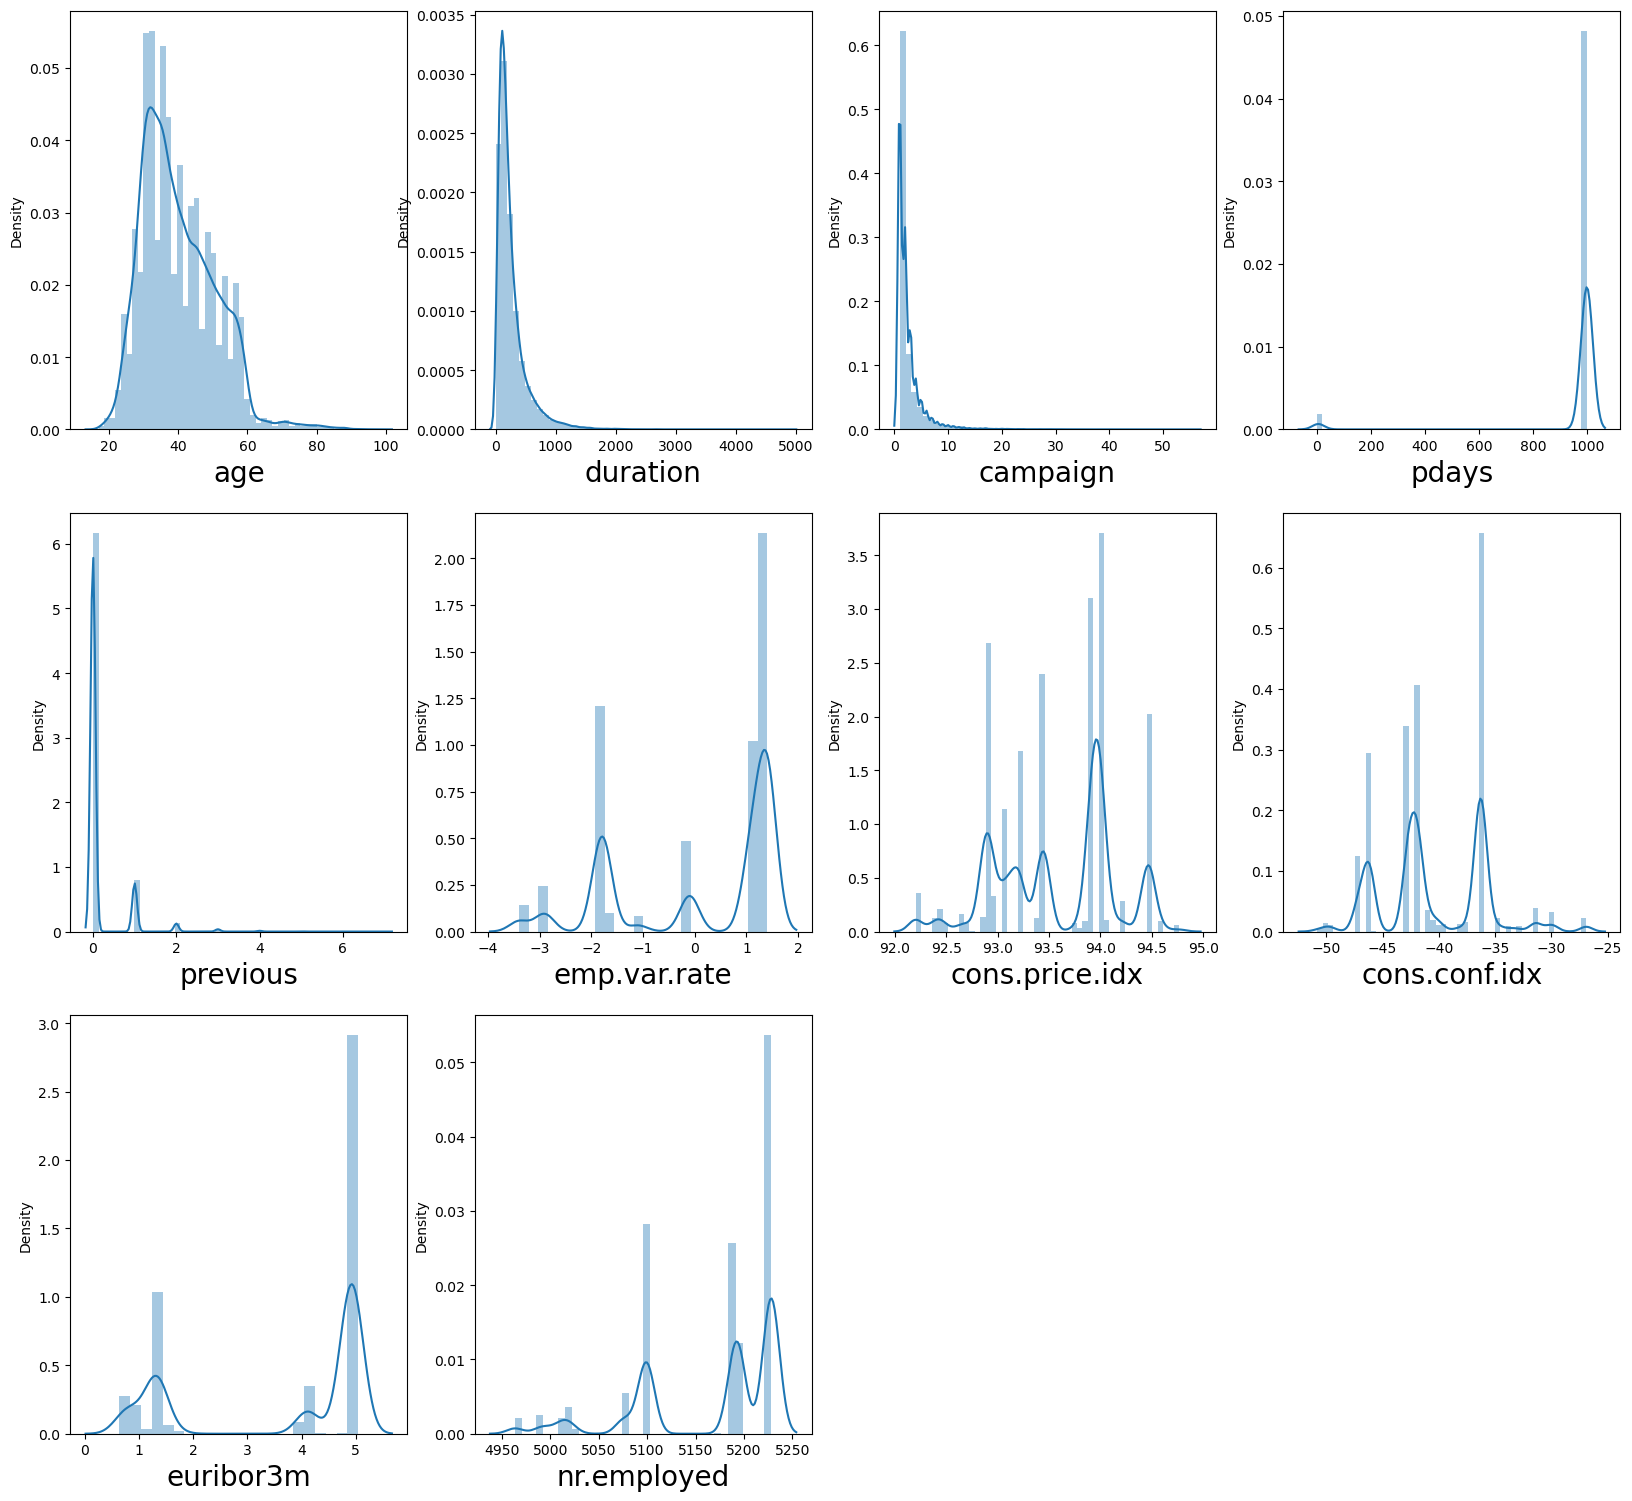

In [66]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :     # as there are 10 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [35]:
data.select_dtypes(include='object').nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [54]:
data_select = data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'] ]
data_select

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [55]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

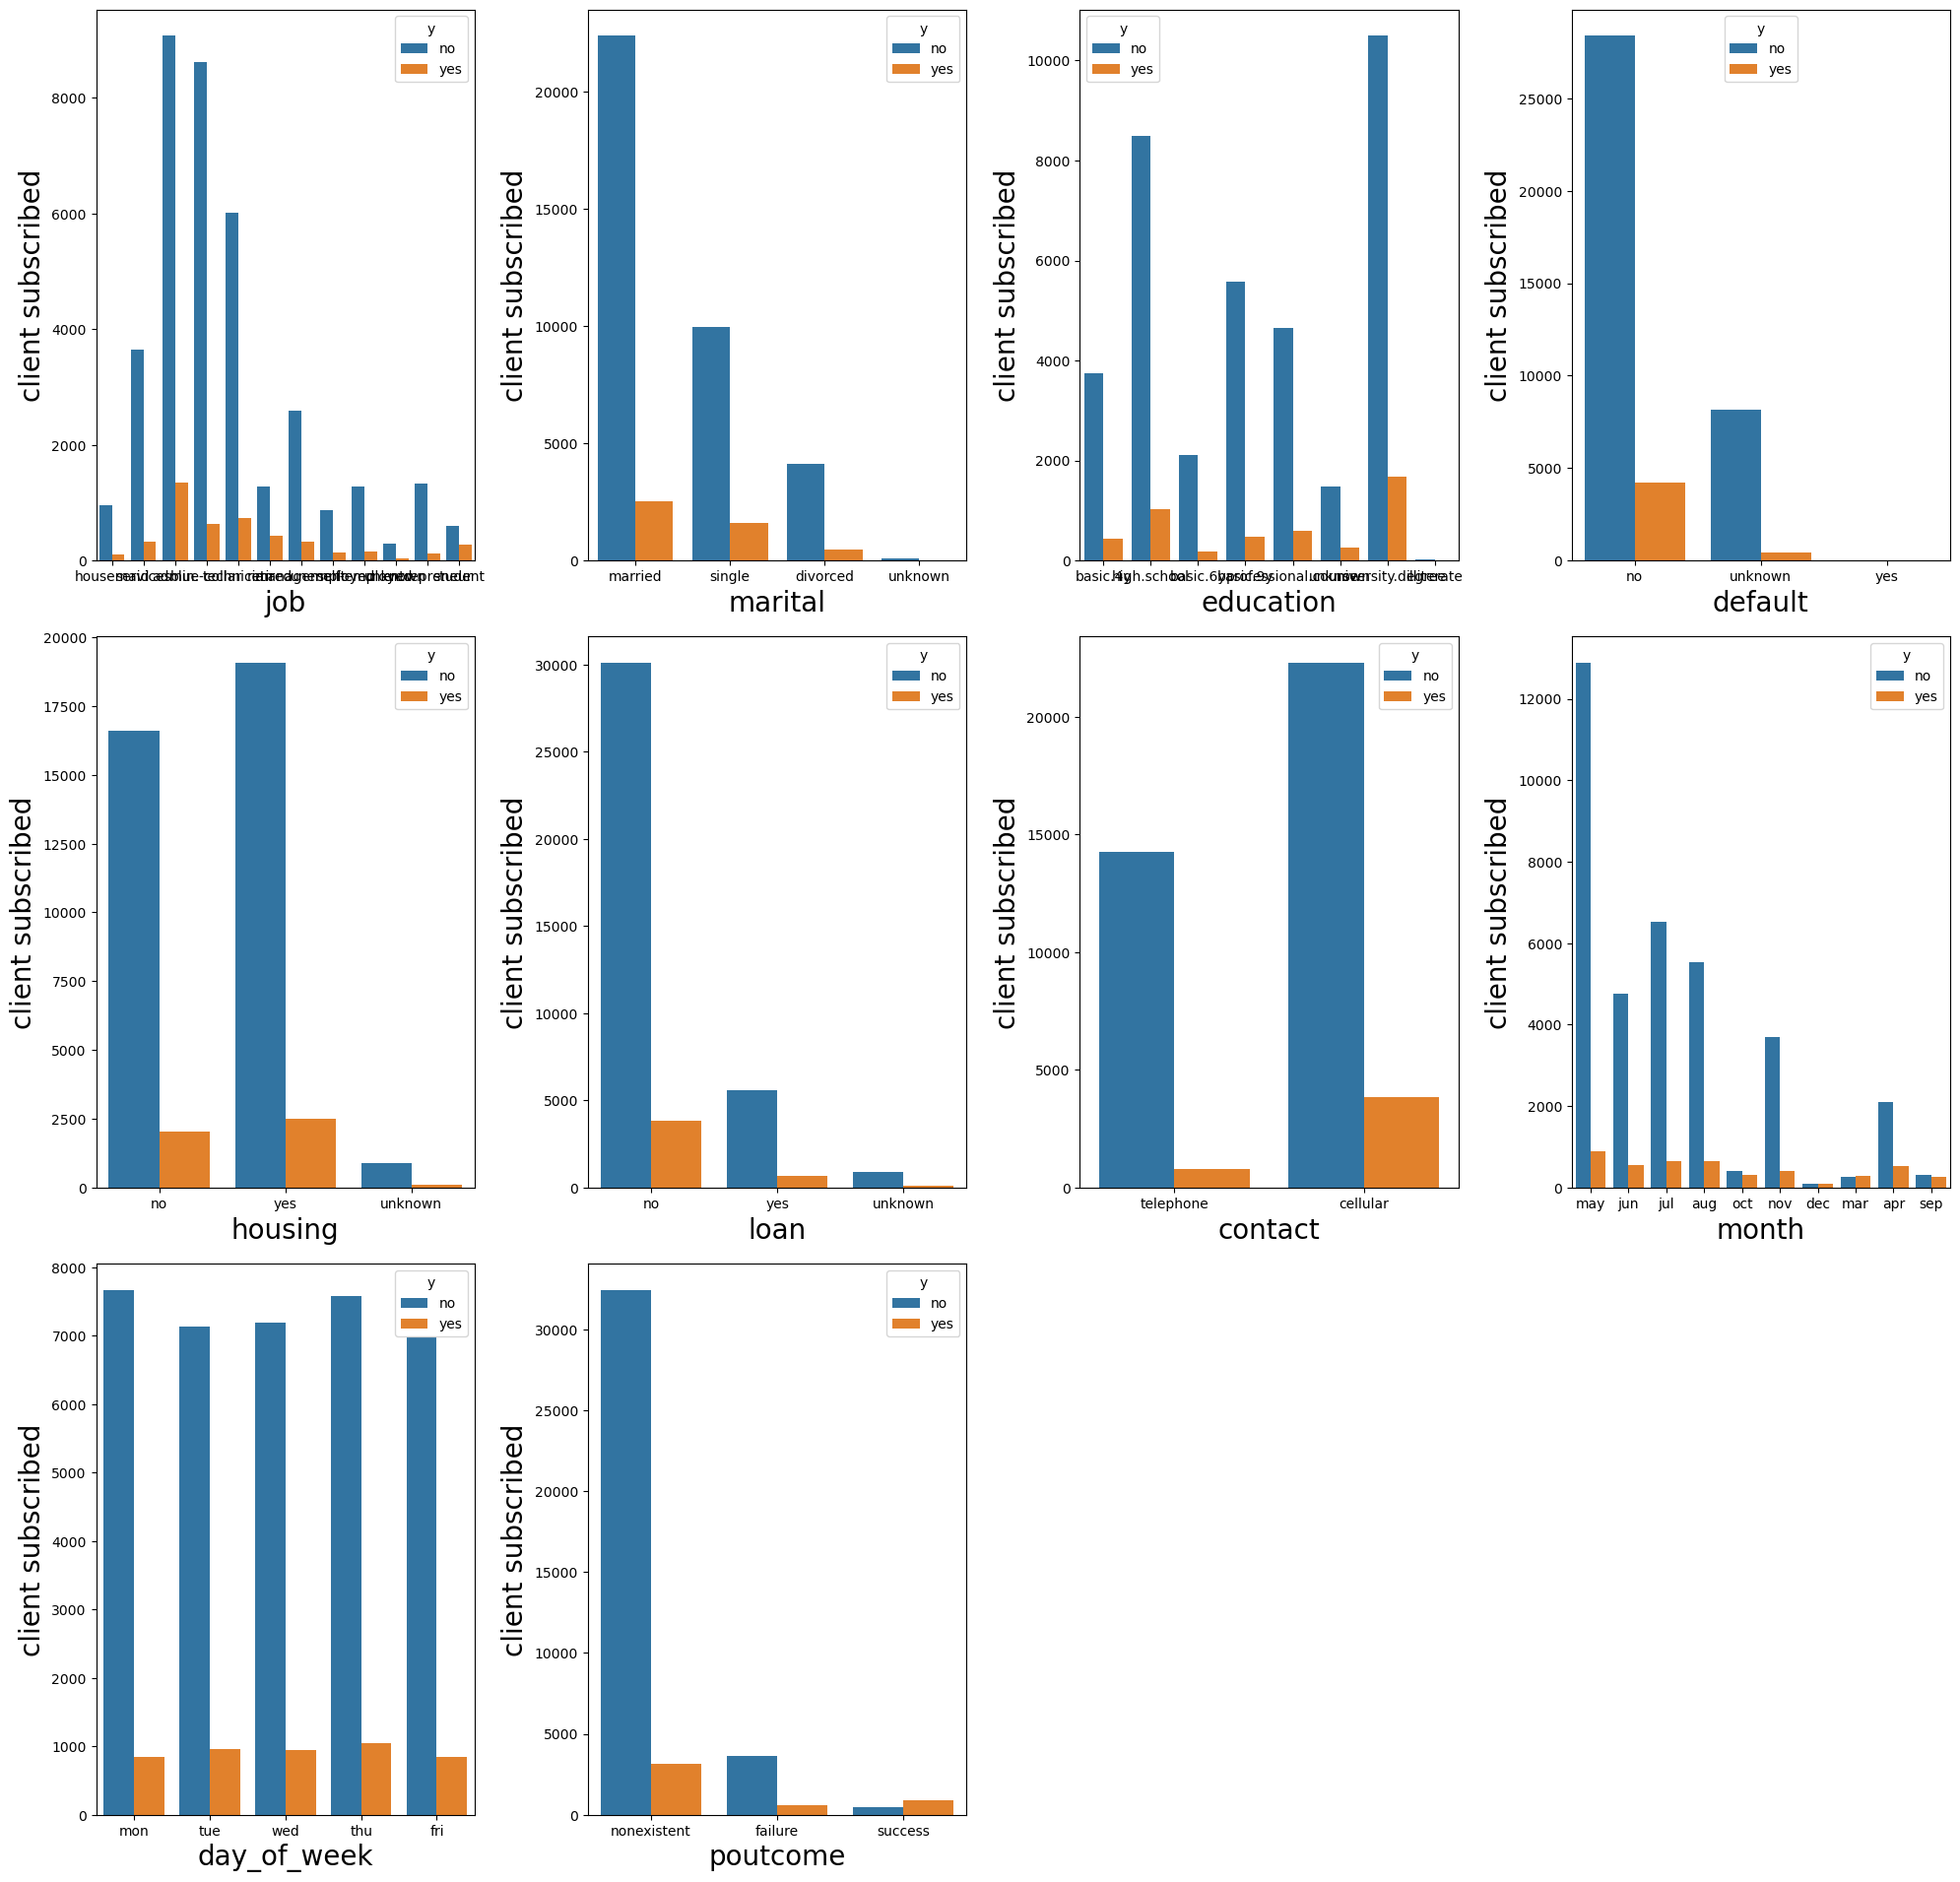

In [62]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data_select:
    if plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data_select[column].dropna(axis=0)
                        ,hue=data['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('client subscribed',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Bivariant analysis of continuous variables

In [63]:
## Create a new dataframe with continuous variables only
data1=data[['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']]

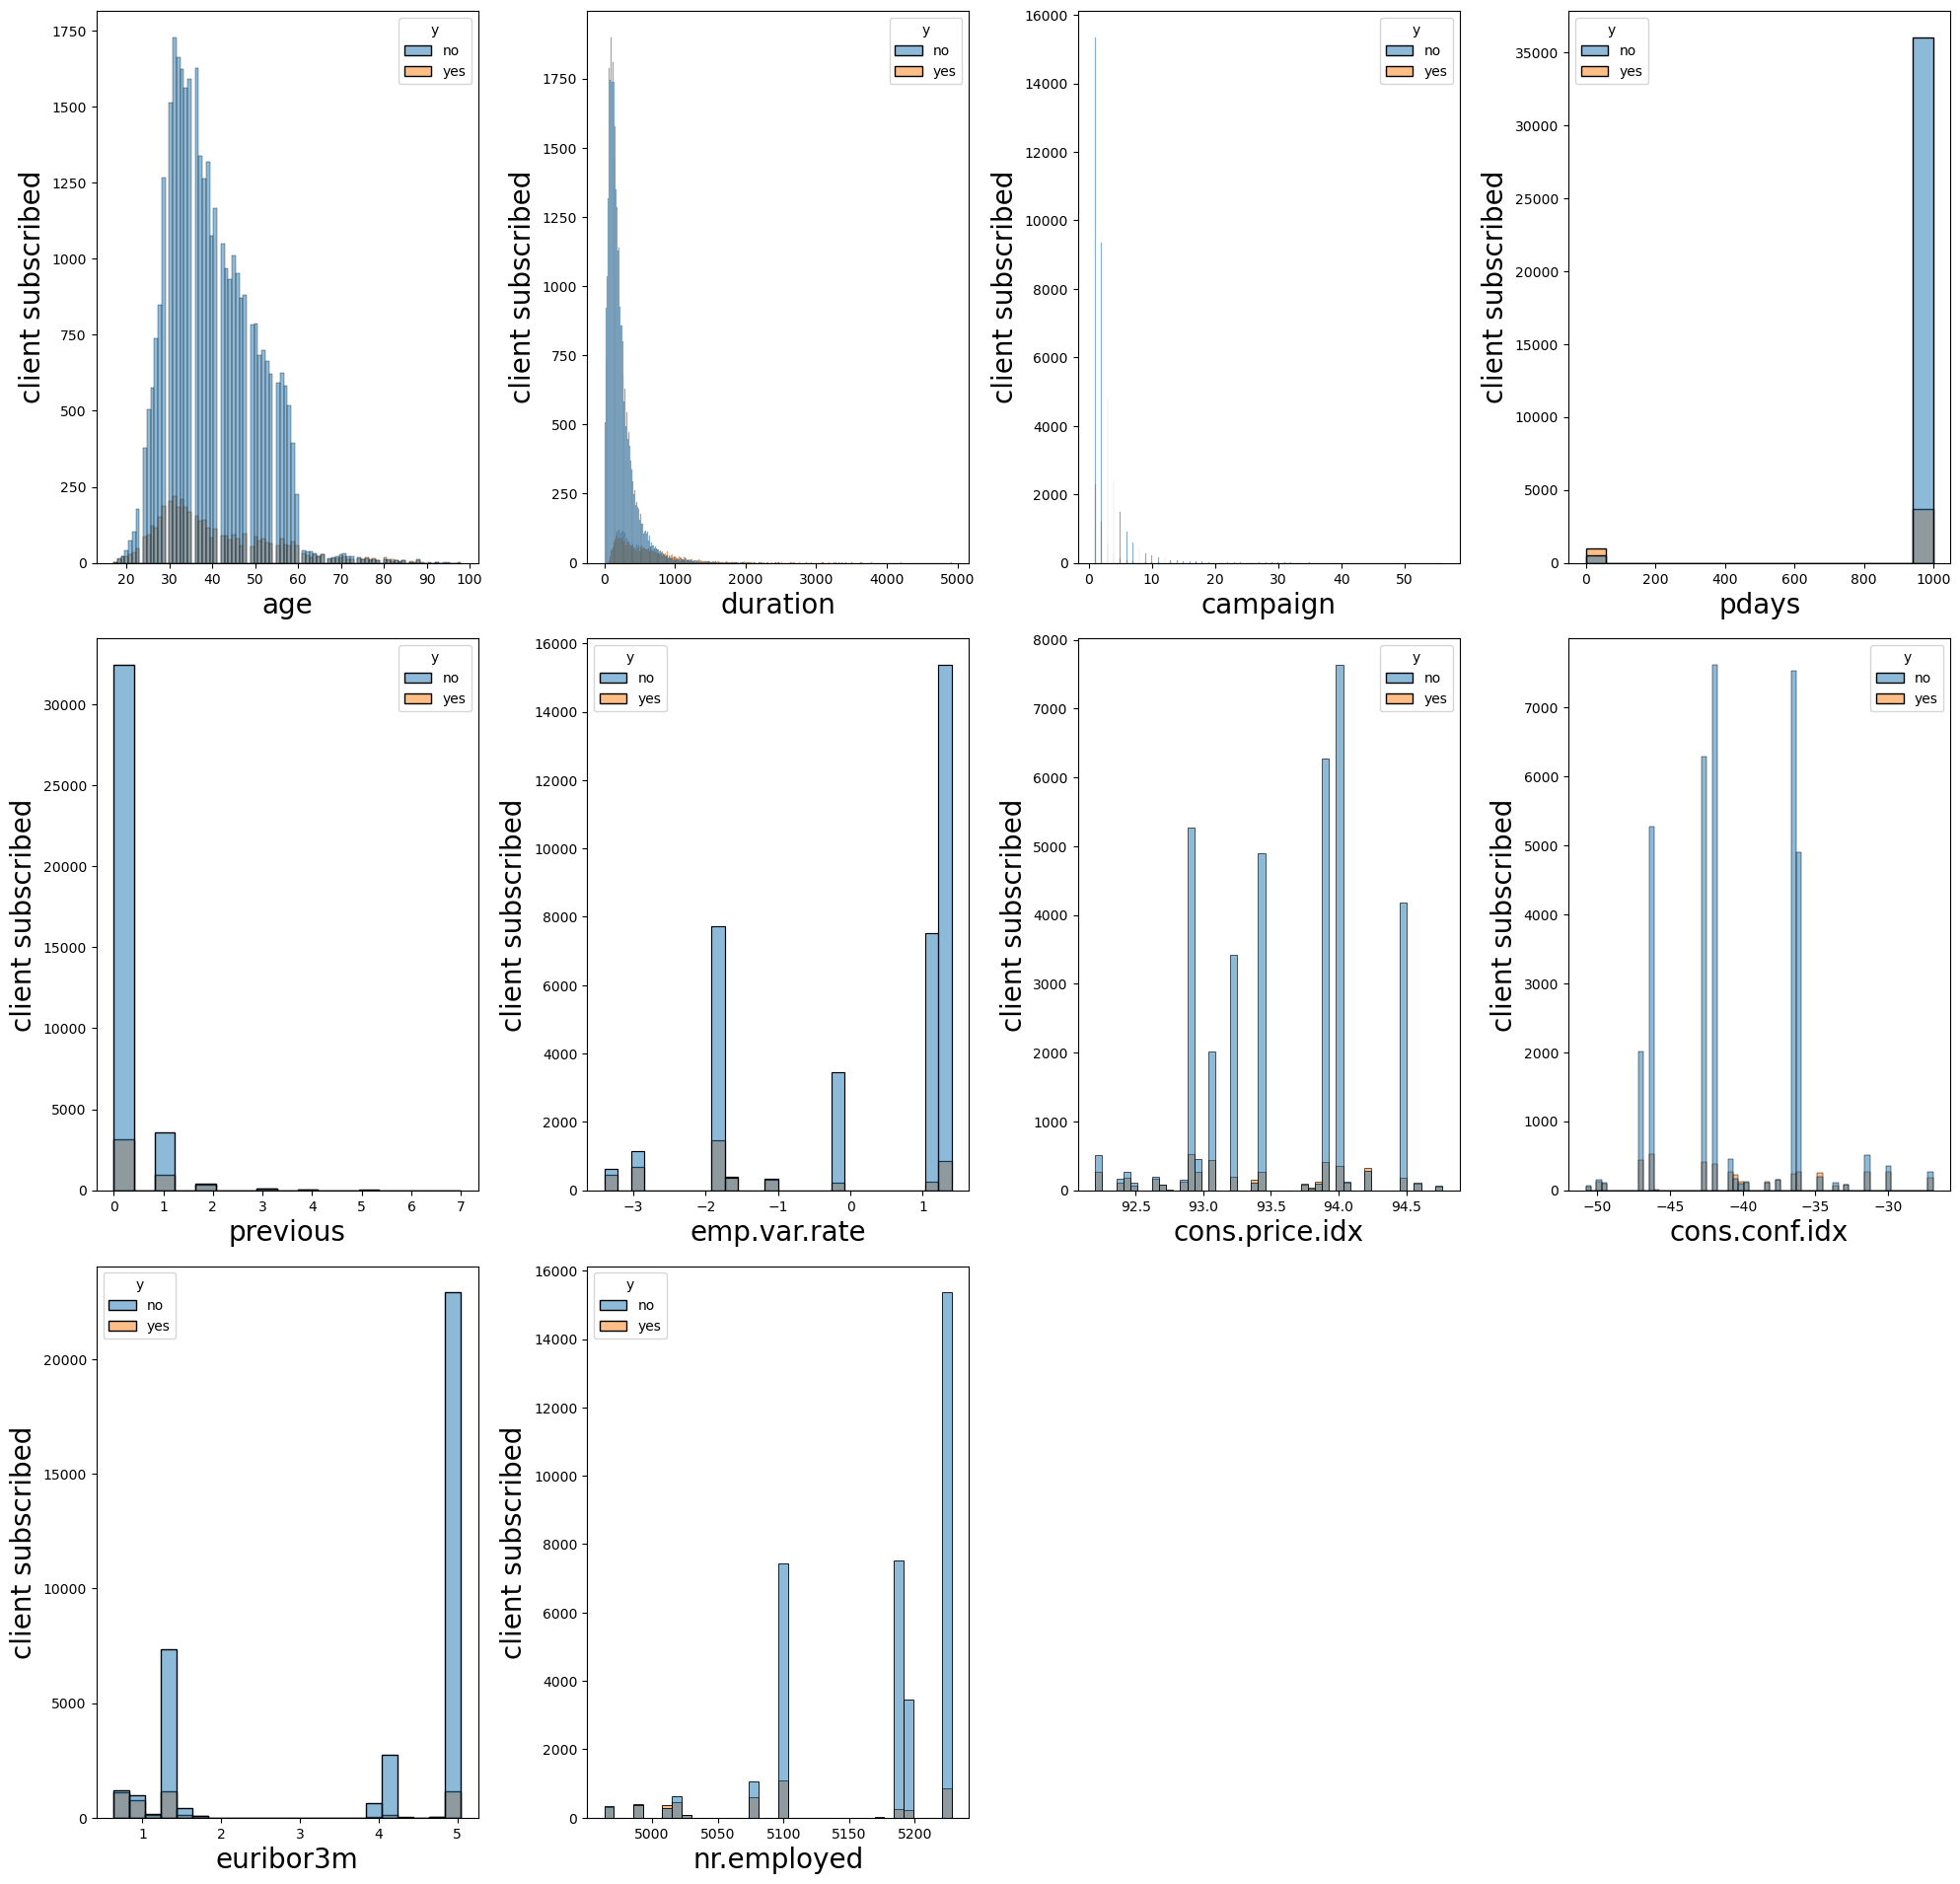

In [64]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data1:#acessing columns form data1 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data1[column].dropna(axis=0)# plotting hist plot and dropping null values,classification according to target
                        ,hue=data['y'])
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('client subscribed',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

In [67]:
data_select

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


# Data Preprocessing Pipeline

In [111]:
# Checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [70]:
## Using label encoder to convert the categorical data to numerical data

# Ordinal data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.job=lc.fit_transform(data.job)
data.marital=lc.fit_transform(data.marital)
data.education=lc.fit_transform(data.education)
data.default=lc.fit_transform(data.default)
data.housing=lc.fit_transform(data.housing)  
data.loan=lc.fit_transform(data.loan)
data.contact=lc.fit_transform(data.contact)
data.month=lc.fit_transform(data.month)
data.day_of_week=lc.fit_transform(data.day_of_week)
data.poutcome=lc.fit_transform(data.poutcome)
data.y=lc.fit_transform(data.y)

In [71]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [72]:
## checking the duplicate rows
data.duplicated().sum()

12

In [74]:
# Create a boolean mask for duplicates
mask = data.duplicated()
mask

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [76]:
# Filter the DataFrame to show only rows that are duplicates
duplicates = data[mask]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,1,1,1,0,0,0,1,6,2,124,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
12261,36,5,1,7,0,0,0,1,3,2,88,1,999,0,1,1.4,93.918,-42.7,4.966,5228.1,0
14234,27,9,2,5,0,0,0,0,3,1,331,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
16956,47,9,0,3,0,2,0,0,3,2,43,3,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
18465,32,9,2,5,0,2,0,0,3,2,128,1,999,0,1,1.4,93.918,-42.7,4.968,5228.1,0
20216,55,7,1,3,1,0,0,0,1,1,33,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0
20534,41,9,1,5,0,2,0,0,1,3,127,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0
25217,39,0,1,6,0,0,0,0,7,3,123,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
28477,24,7,2,3,0,2,0,0,0,3,114,1,999,0,1,-1.8,93.075,-47.1,1.423,5099.1,0
32516,35,0,1,6,0,2,0,0,6,0,348,4,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0


In [77]:
# dropping the rows that has duplicate
data = data.drop_duplicates()

In [78]:
data.duplicated().sum()

0

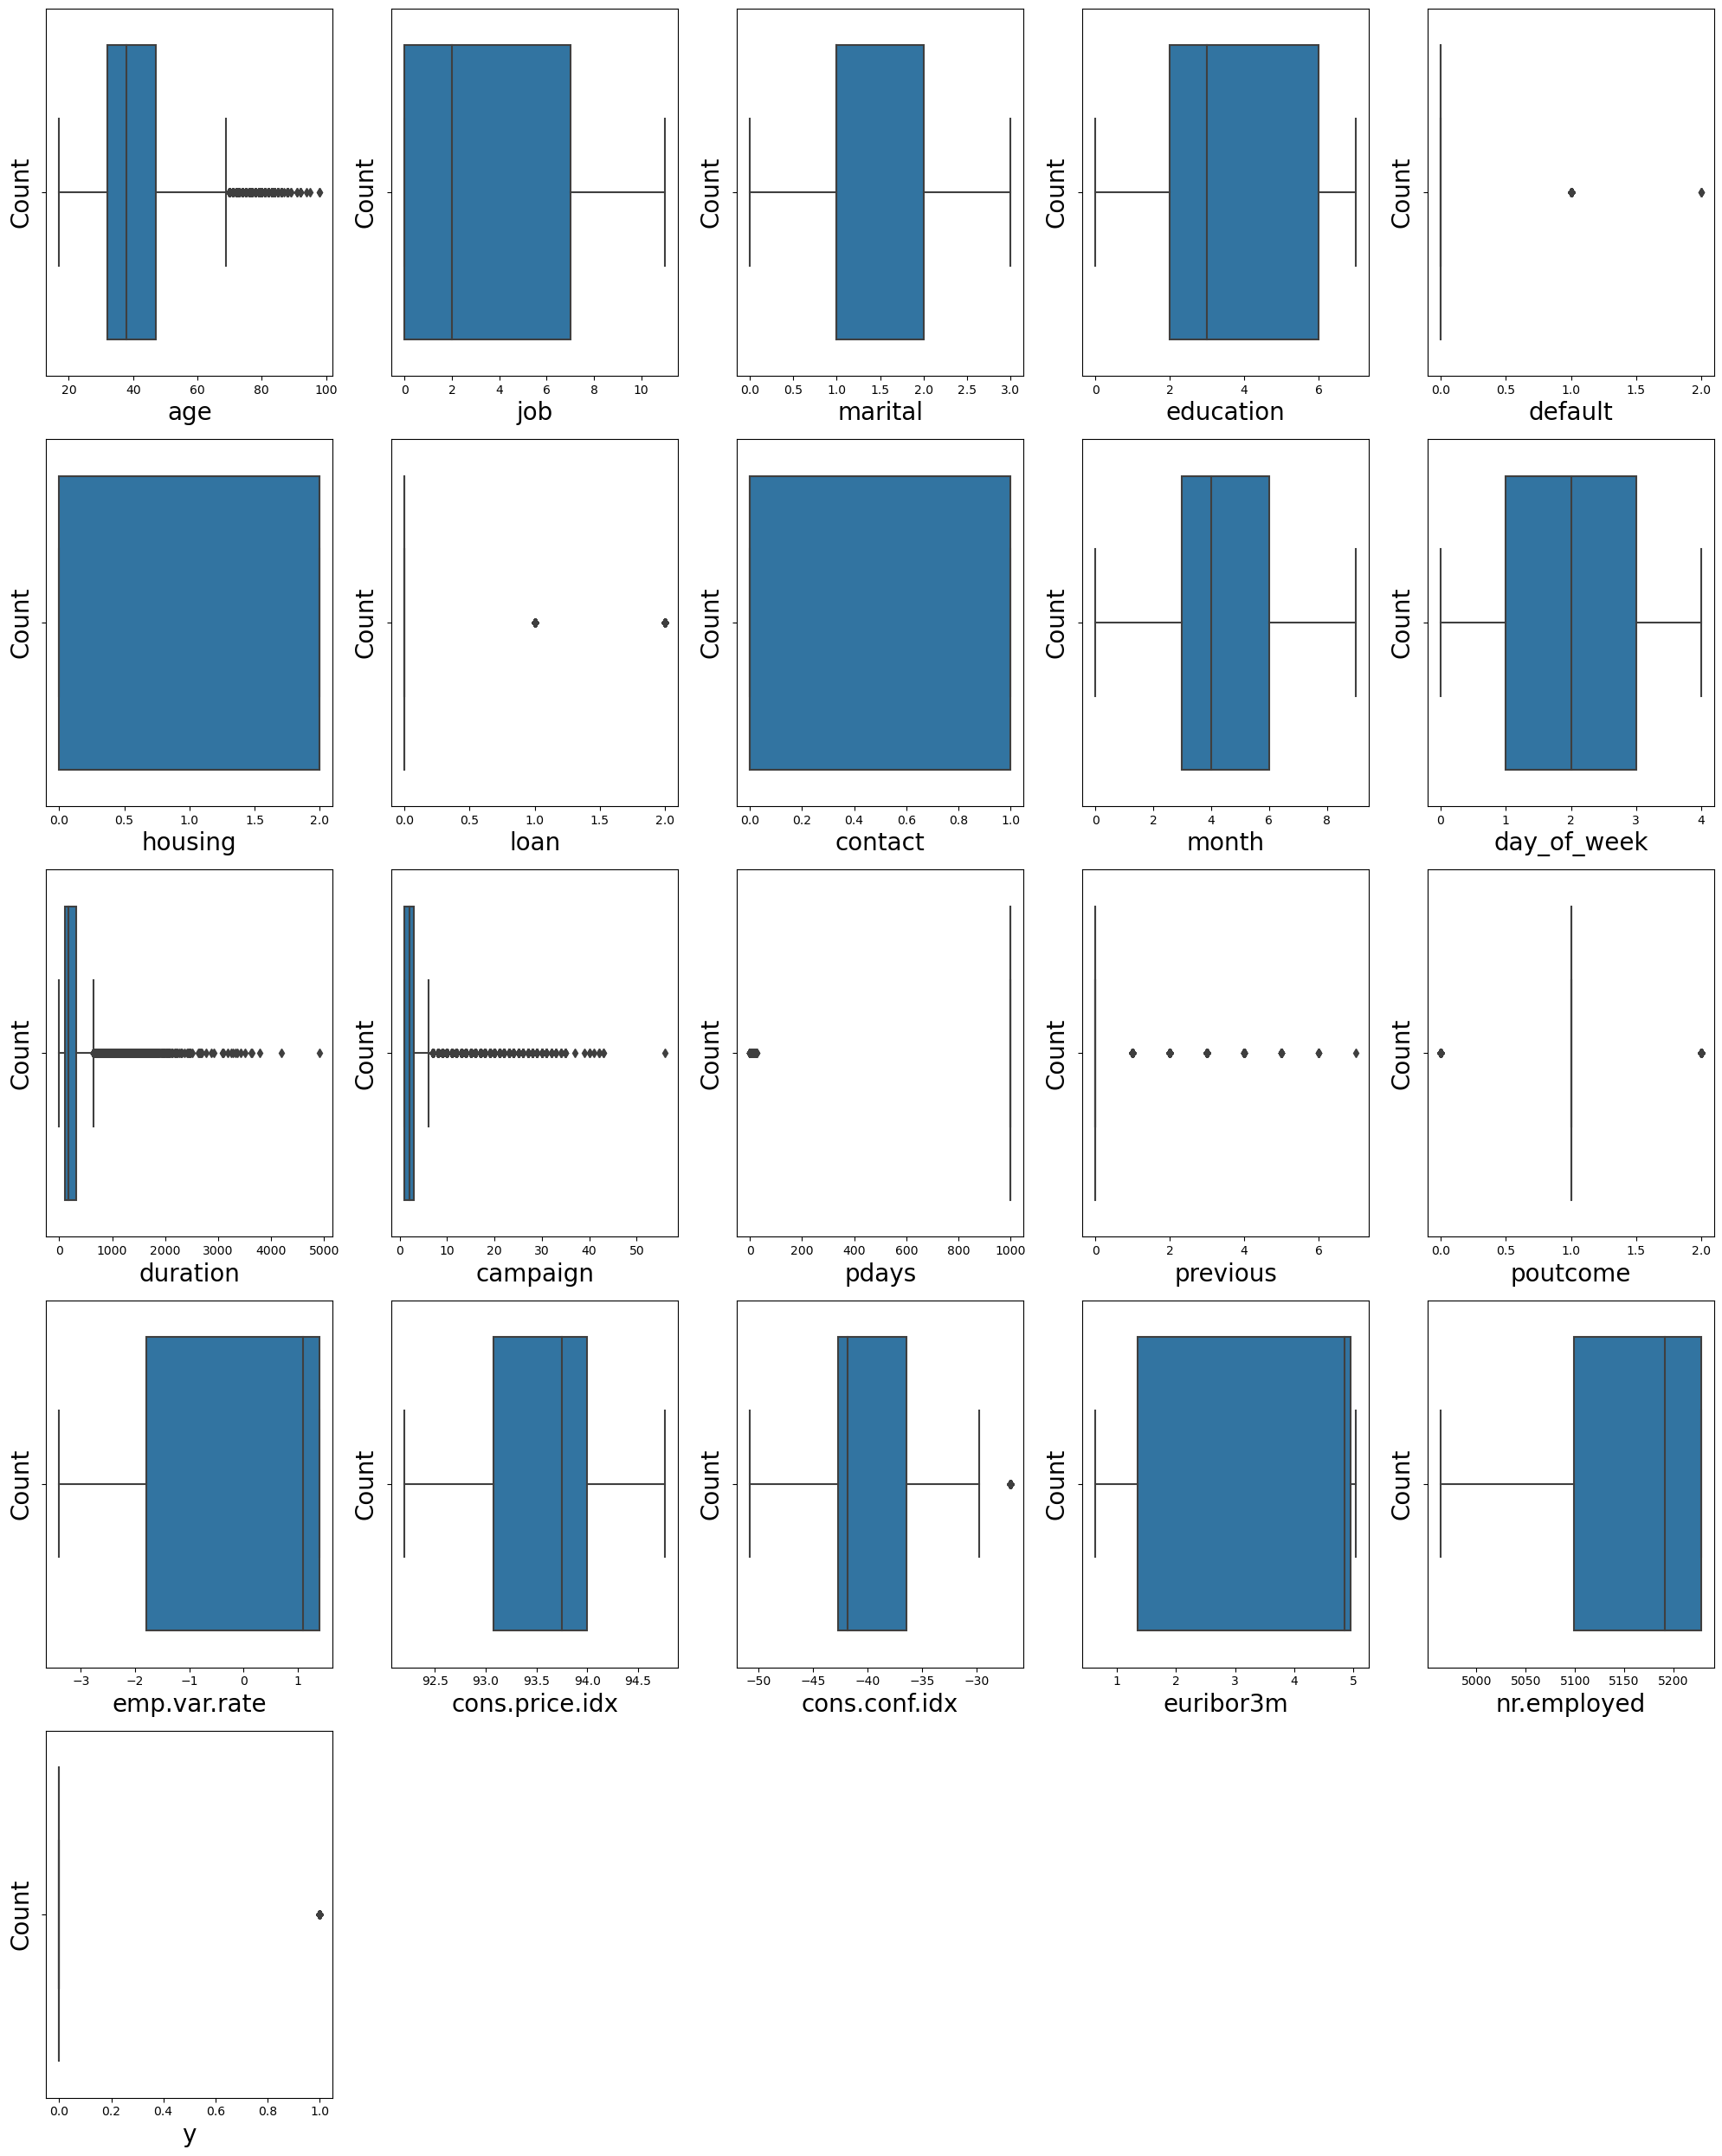

In [110]:


## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

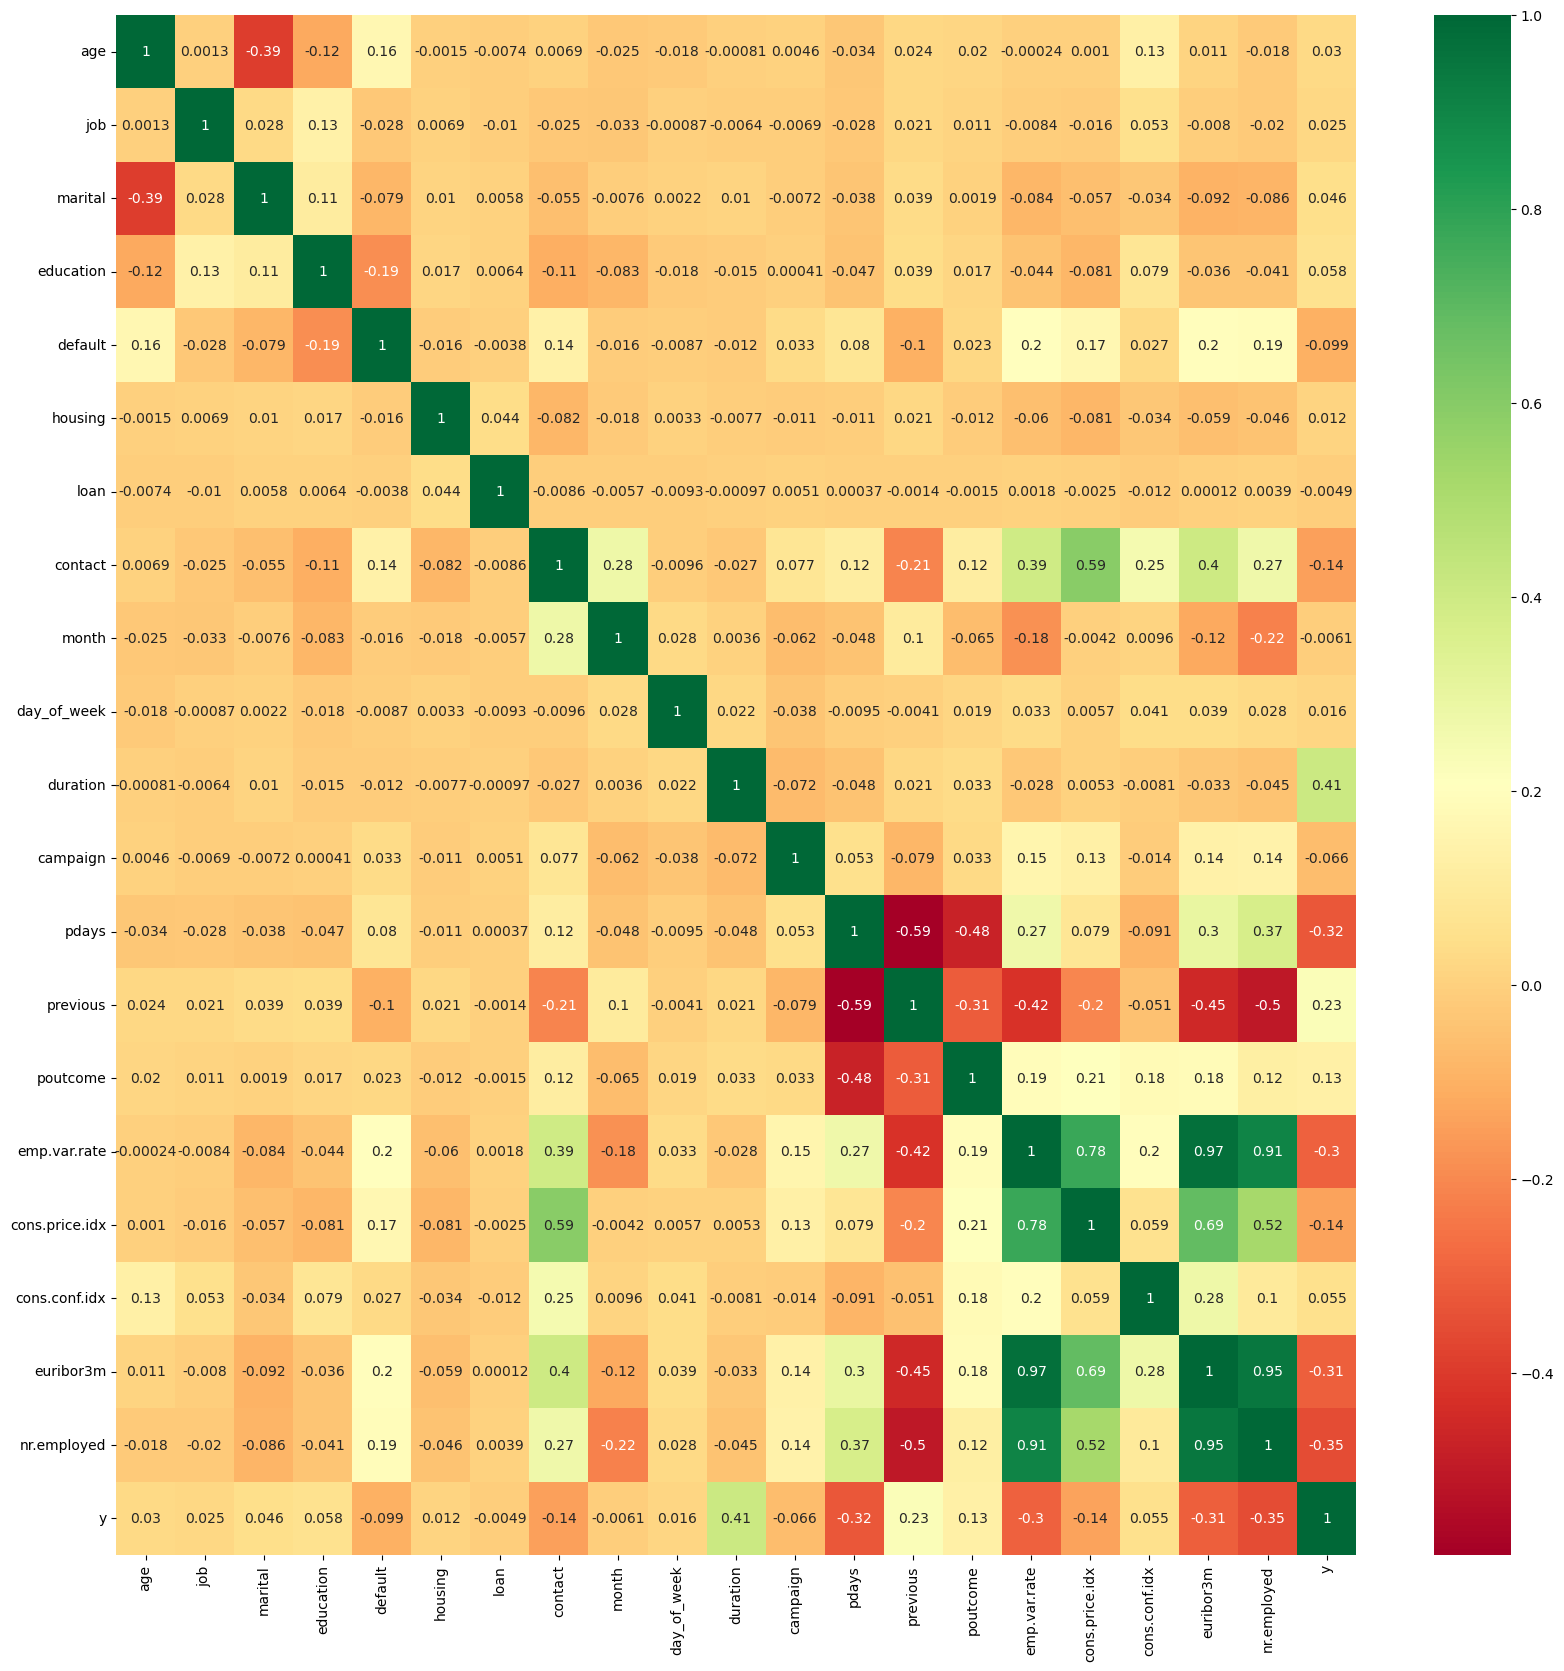

In [81]:
## Checking correlation

plt.figure(figsize=(20,20))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})#plotting heat map to check correlation

# Model Creation

In [83]:
## Step 1 Creating independent and dependent variable.

X=data.iloc[:,:-1]
y=data.y

In [84]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [85]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

In [86]:
data.shape

(41176, 21)

In [87]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [88]:
y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [89]:
## balancing the data

# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [90]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module.

In [91]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 27399, 1: 3483})
SMOTE Classes Counter({0: 27399, 1: 27399})


In [98]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [99]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [100]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.8374781426073441

In [101]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      9138
           1       0.39      0.83      0.54      1156

    accuracy                           0.84     10294
   macro avg       0.68      0.84      0.72     10294
weighted avg       0.91      0.84      0.86     10294

